# Analysis description regarding the scrapped news of the SP500

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/valentinaolaritei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/valentinaolaritei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
# import some functions from another Jupyter
%run 0_all_functions.ipynb

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/valentinaolaritei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/valentinaolaritei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/valentinaolaritei/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# read csv file
path = './sp500_news.csv'
df = pd.read_csv(path)

In [4]:
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,ticker,date,title,source,link_source,stock,gisc_sectors
0,0,0,0.0,zts,5/22/2013 2:52:27 PM,Pfizer to spin off Zoetis stake to shareholders,Reuters,http://feeds.reuters.com/~r/reuters/businessNe...,Zoetis,Health Care
1,1,1,1.0,zts,6/24/2013 4:28:40 PM,Pfizer says shareholders snap up remaining Zoe...,Reuters,http://feeds.reuters.com/~r/reuters/businessNe...,Zoetis,Health Care
2,2,2,2.0,zts,6/25/2015 10:35:18 PM,Valeant offers to buy Zoetis: WSJ,Reuters,http://feeds.reuters.com/~r/reuters/businessNe...,Zoetis,Health Care
3,3,3,3.0,zts,5/10/2016 12:57:59 AM,Ackman's Pershing Square seeks to sell Zoetis ...,Reuters,http://feeds.reuters.com/~r/reuters/businessNe...,Zoetis,Health Care
4,4,4,4.0,zts,2/27/2017 1:10:00 PM,Technical Reports on Generic Drugs Stocks -- Z...,PR Newswire,https://markets.businessinsider.com/news/stock...,Zoetis,Health Care


In [5]:
df.shape

(581707, 10)

Replace empty cells with NaN. In this way, 'dropna' function can be used.

In [6]:
df.replace('', np.nan, inplace=True)
df.dropna(inplace=True)
df.shape

(579057, 10)

In [7]:
# drop useless columns
df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'], axis=1, inplace=True)
df.head()

,ticker,date,title,source,link_source,stock,gisc_sectors
0,zts,5/22/2013 2:52:27 PM,Pfizer to spin off Zoetis stake to shareholders,Reuters,http://feeds.reuters.com/~r/reuters/businessNe...,Zoetis,Health Care
1,zts,6/24/2013 4:28:40 PM,Pfizer says shareholders snap up remaining Zoe...,Reuters,http://feeds.reuters.com/~r/reuters/businessNe...,Zoetis,Health Care
2,zts,6/25/2015 10:35:18 PM,Valeant offers to buy Zoetis: WSJ,Reuters,http://feeds.reuters.com/~r/reuters/businessNe...,Zoetis,Health Care
3,zts,5/10/2016 12:57:59 AM,Ackman's Pershing Square seeks to sell Zoetis ...,Reuters,http://feeds.reuters.com/~r/reuters/businessNe...,Zoetis,Health Care
4,zts,2/27/2017 1:10:00 PM,Technical Reports on Generic Drugs Stocks -- Z...,PR Newswire,https://markets.businessinsider.com/news/stock...,Zoetis,Health Care


In [8]:
# convert into datetime for the plots
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

/var/folders/tp/_pk1n96524l_vsmbtrwqn7jc0000gn/T/ipykernel_53599/2698892134.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


Consider the first 100 stocks based on the number of news.

In [9]:
# Count the occurrences of each stock
stock_counts = df['ticker'].value_counts()

# Get the top 100 stocks
top_100_stocks = stock_counts.head(100).index

# Filter the original DataFrame to include only rows with the top 100 stocks
df1 = df[df['ticker'].isin(top_100_stocks)]

In [10]:
df1.shape

(359660, 9)

-------------------------------------------------------------------------------------------------------------------

# Compute and/or visualize some summary statistics

Number of sources

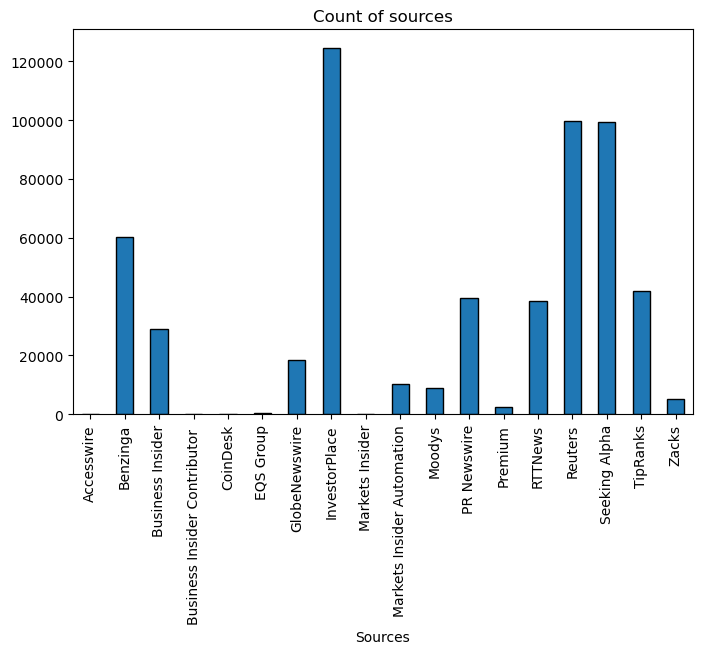

In [38]:
# imported from all_functions.ipynb
plot_number_sources(df)

Plot number of GISC sectors

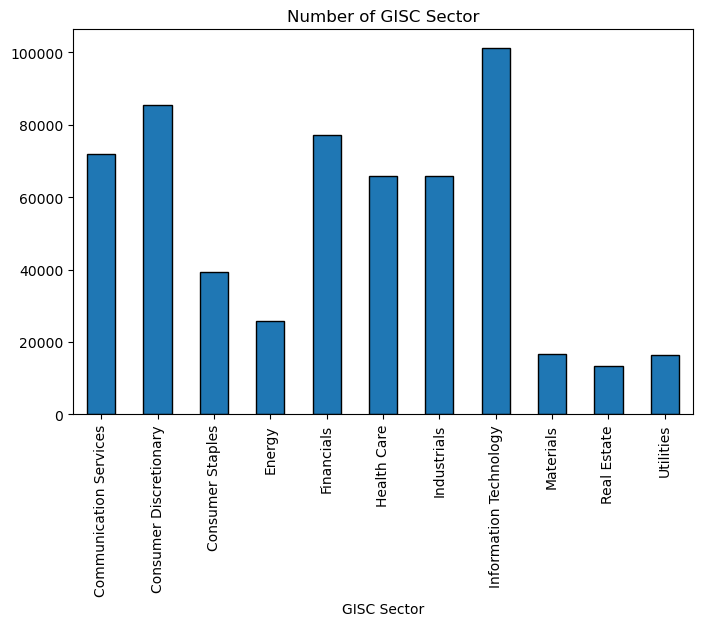

In [39]:
# imported from all_functions.ipynb
plot_number_gisc_sectors(df)

Articles per stock

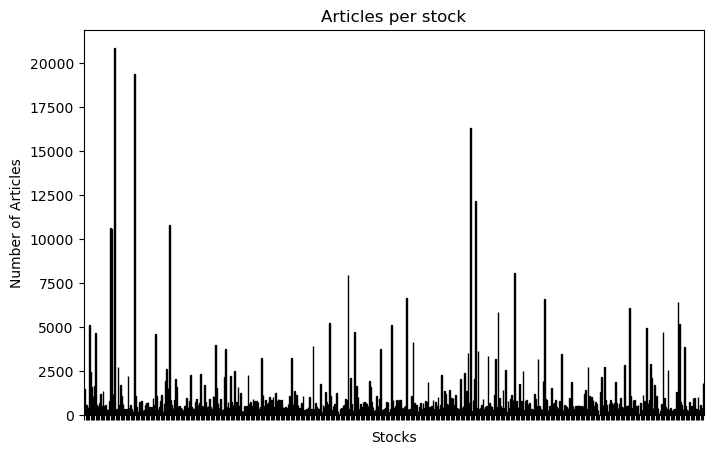

In [40]:
# imported from all_functions.ipynb
plot_number_stock_article(df)

Frequency: top 25

In [14]:
# compute frequency of each stock
stock_articles_counts = df.groupby('stock')['title'].count().reset_index()
stock_articles_counts.columns = ['stock', 'number_articles']
stock_articles_counts.sort_values('number_articles', inplace=True, ascending=False)
stock_articles_counts.reset_index(inplace=True, drop=True)
stock_articles_counts.head(25)

,stock,number_articles
0,Amazon,20841
1,Apple Inc.,19391
2,Meta Platforms,16285
3,Microsoft,12172
4,Boeing,10810
5,Alphabet Inc. (Class A),10617
6,Alphabet Inc. (Class C),10561
7,Nvidia,8072
8,General Motors,7933
9,JPMorgan Chase,6629


Real top 25 (https://www.slickcharts.com/sp500)

In [15]:
# List of stock names
stocks_top_25 = [
    'Microsoft', 'Apple', 'Nvidia', 'Amazon', 'Meta', 'Alphabet Class A', 'Alphabet Class B', 
    'Berkshire Hathaway', 'Eli Lilly', 'Broadcom Inc', 'JP Morgan', 'Exxon Mobil', 'Tesla', 
    'Unitedhealth Group', 'Visa', 'Procter&Gamble', 'MasterCard', 'Johnson&Johnson', 
    'Costco Wholesale', 'Merck&Co', 'Home Depot', 'Abbvie', 'Walmart', 'Netflix', 'Chevron'
]

# Create a DataFrame
real_top_25 = pd.DataFrame(stocks_top_25, columns=['stock'])
real_top_25.head()

,stock
0,Microsoft
1,Apple
2,Nvidia
3,Amazon
4,Meta


Comparison between 2 dataframes: the one sorted based on the news & the one sorted by their weights in the SP500

In [16]:
from IPython.display import display, HTML

# Function to display DataFrames side by side
def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
    display(HTML('<table><tr>' + ''.join([f'<td>{df.to_html(index=False)}</td>' for df in args]) + '</tr></table>'))

# Display the DataFrames side by side
display_side_by_side(stock_articles_counts.drop(columns=['number_articles']).rename(columns = {'stock' : 'stock sorted based on # scraped news'}).head(25), real_top_25.rename(columns = {'stock' : 'stock sorted based on real weight'}))

stock sorted based on # scraped news
Amazon
Apple Inc.
Meta Platforms
Microsoft
Boeing
Alphabet Inc. (Class A)
Alphabet Inc. (Class C)
Nvidia
General Motors
JPMorgan Chase


Plot frequency stocks

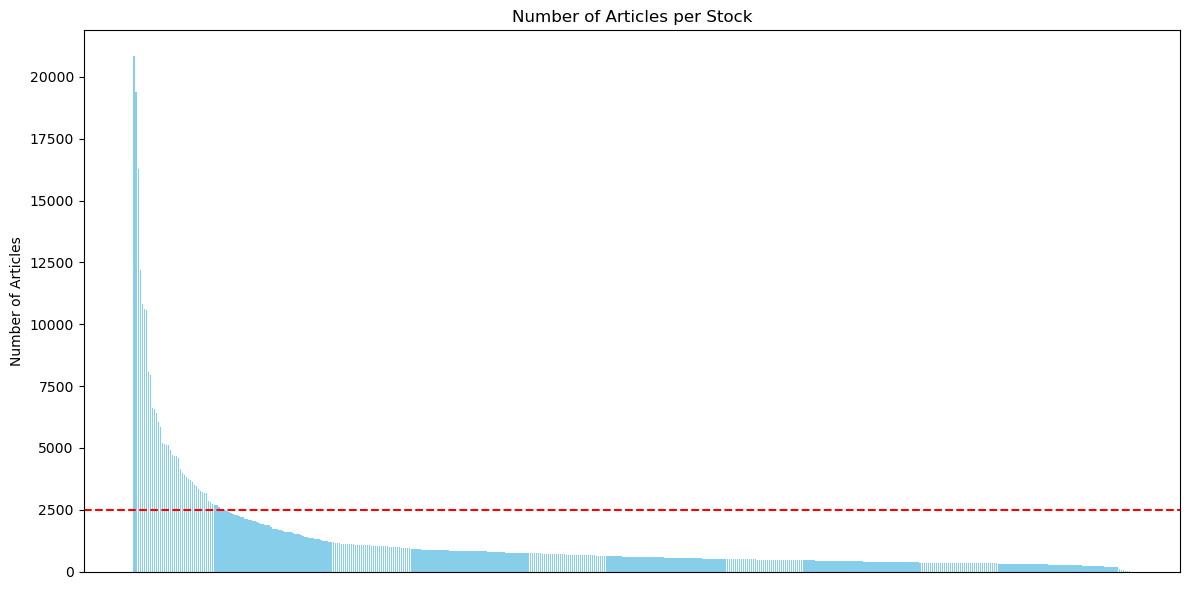

In [45]:
# Sort by 'number_articles' in descending order
stock_articles_counts.sort_values('number_articles', inplace=True, ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(stock_articles_counts.index, stock_articles_counts['number_articles'], color='skyblue')
plt.xlabel('')  # Remove x-axis label
plt.xticks([])  # Remove x-axis ticks
plt.ylabel('Number of Articles')
plt.title('Number of Articles per Stock')
plt.tight_layout()
# Add a horizontal line at y=2500
plt.axhline(y=2500, color='r', linestyle='--')
plt.show()


Stocks with more than 2.500 articles

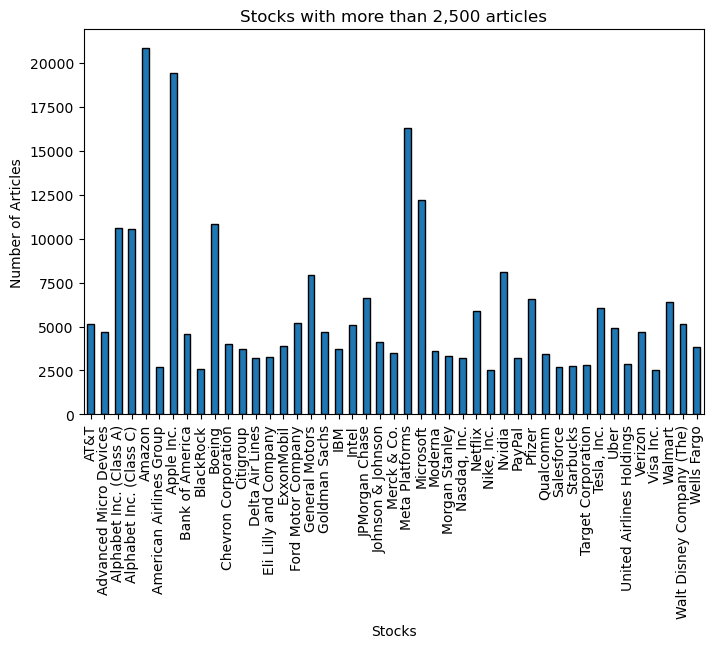

'\n    BA --> Boeing, which has 0.27% weight\n    GM --> General Motors, which has 0.12% weight\n    WM --> Walmart, 0.59% weight, \n'

In [36]:
# imported from all_functions.ipynb
plot_more_2500_stock_article(df)

"""
    BA --> Boeing, which has 0.27% weight
    GM --> General Motors, which has 0.12% weight
    WM --> Walmart, 0.59% weight, 
"""

Number of articles per year

In [19]:
year_articles_counts = df.groupby('year')['title'].count().reset_index()
year_articles_counts.columns = ['year', 'number_articles']
year_articles_counts.sort_values('number_articles', inplace=True, ascending=False)
year_articles_counts.reset_index(inplace=True, drop=True)
year_articles_counts

,year,number_articles
0,2023,111672
1,2022,90801
2,2021,78356
3,2020,69118
4,2017,67218
5,2019,52313
6,2024,50608
7,2018,38842
8,2016,10019
9,2013,3200


In [20]:
# print LaTeX table above
print(year_articles_counts.to_latex(
                  formatters={"name": str.upper},
                  float_format="{:.1f}".format,))

\begin{tabular}{lrr}
\toprule
 & year & number_articles \\
\midrule
0 & 2023 & 111672 \\
1 & 2022 & 90801 \\
2 & 2021 & 78356 \\
3 & 2020 & 69118 \\
4 & 2017 & 67218 \\
5 & 2019 & 52313 \\
6 & 2024 & 50608 \\
7 & 2018 & 38842 \\
8 & 2016 & 10019 \\
9 & 2013 & 3200 \\
10 & 2014 & 2862 \\
11 & 2015 & 2299 \\
12 & 2012 & 764 \\
13 & 2011 & 502 \\
14 & 2005 & 176 \\
15 & 2006 & 138 \\
16 & 2007 & 112 \\
17 & 2008 & 57 \\
\bottomrule
\end{tabular}



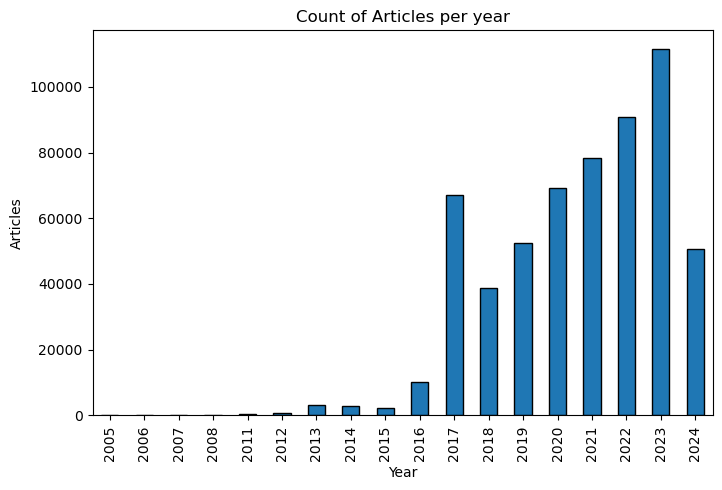

In [41]:
# imported from all_functions.ipynb
plot_number_articles_every_year(df)

Number of articles per month

In [22]:
month_articles_counts = df.groupby('month')['title'].count().reset_index()
month_articles_counts.columns = ['month', 'number_articles']
month_articles_counts.sort_values('number_articles', inplace=True, ascending=False)
month_articles_counts.reset_index(inplace=True, drop=True)
month_articles_counts

,month,number_articles
0,4,63679
1,10,55229
2,2,53327
3,5,51641
4,3,50916
5,1,49664
6,7,48417
7,11,44591
8,6,43915
9,8,41807


In [23]:
# print LaTeX table above
print(month_articles_counts.to_latex(
                  formatters={"name": str.upper},
                  float_format="{:.1f}".format,))

\begin{tabular}{lrr}
\toprule
 & month & number_articles \\
\midrule
0 & 4 & 63679 \\
1 & 10 & 55229 \\
2 & 2 & 53327 \\
3 & 5 & 51641 \\
4 & 3 & 50916 \\
5 & 1 & 49664 \\
6 & 7 & 48417 \\
7 & 11 & 44591 \\
8 & 6 & 43915 \\
9 & 8 & 41807 \\
10 & 12 & 38372 \\
11 & 9 & 37499 \\
\bottomrule
\end{tabular}



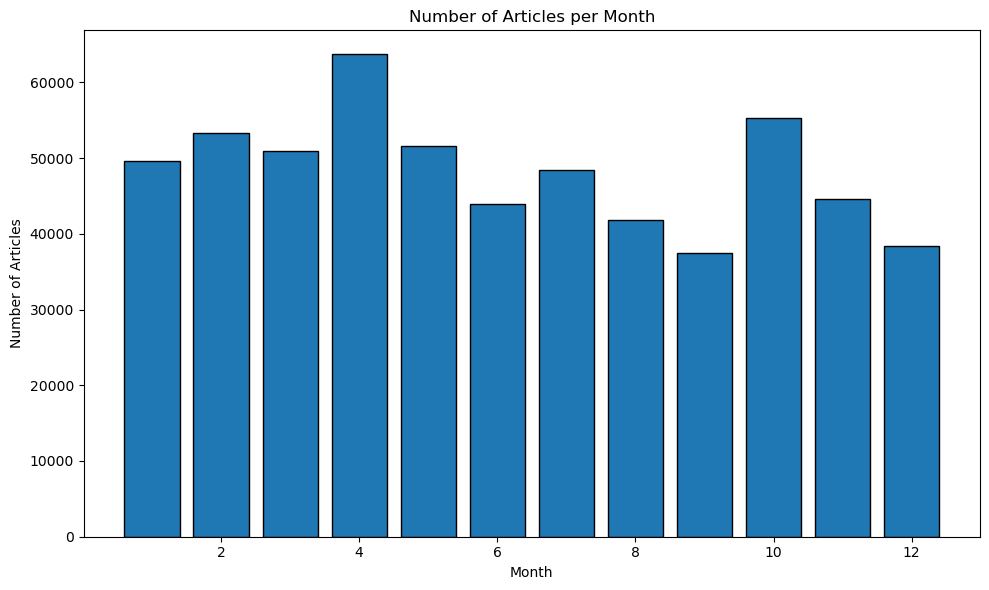

In [42]:
month_articles_counts.sort_values('number_articles', inplace=True, ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(month_articles_counts['month'], month_articles_counts['number_articles'], edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.title('Number of Articles per Month')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

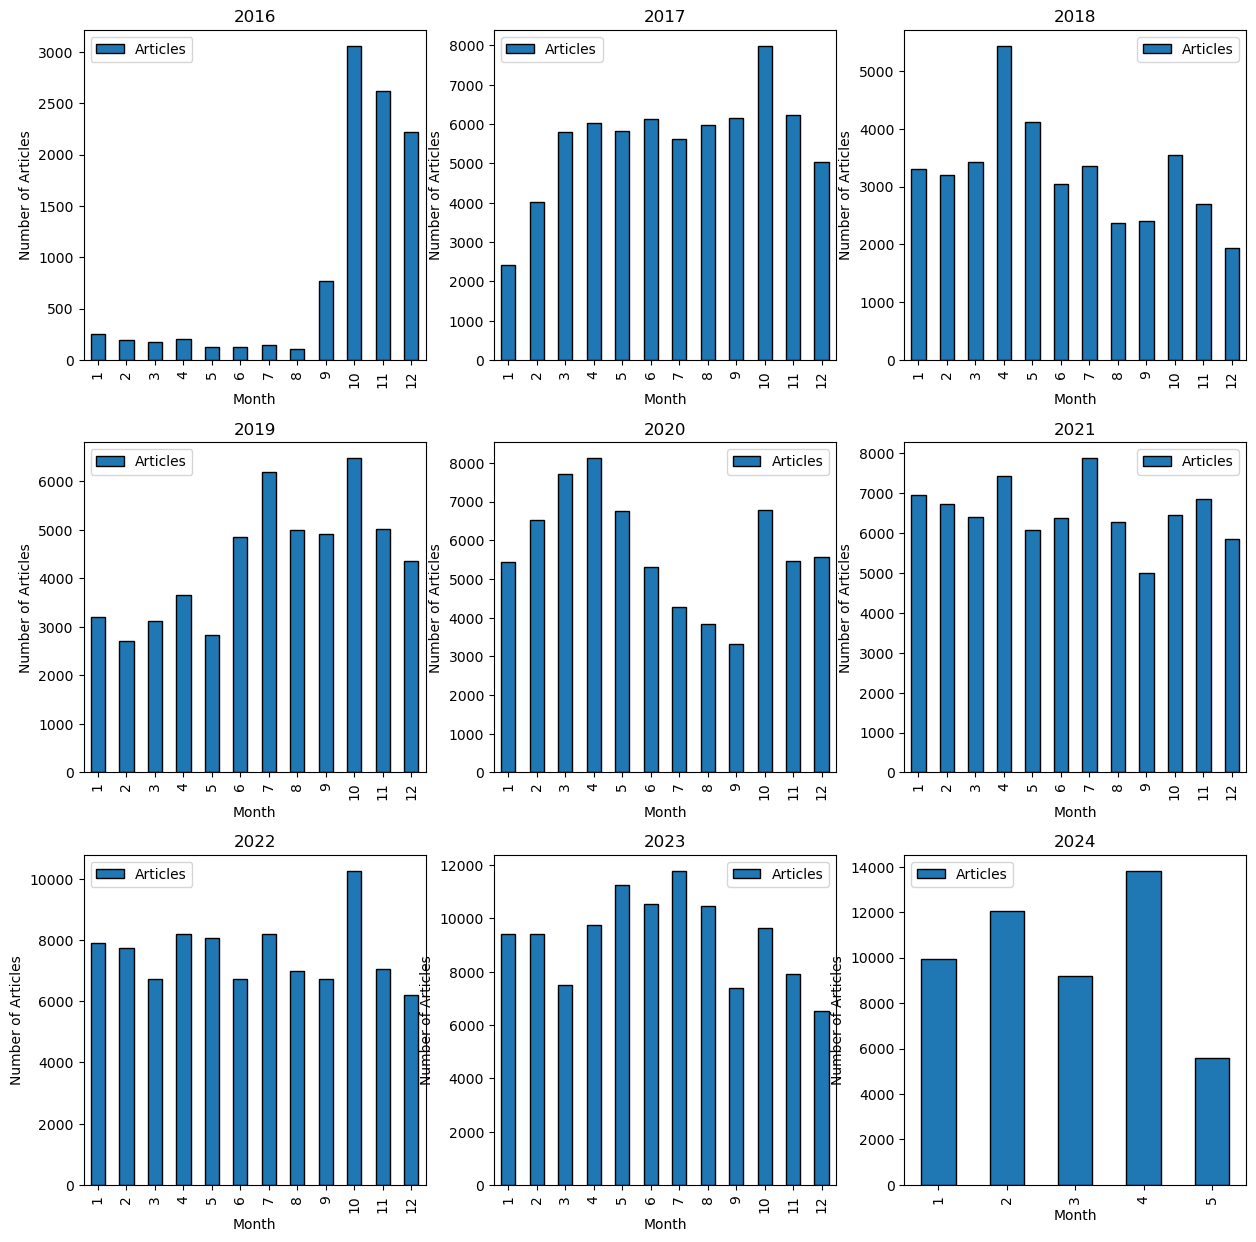

In [48]:
# imported from all_functions.ipynb
plot_monthly_articles_last_9_years(df)

-------------------------------------------------------------------------------------------------------------------

Plot top-n words

In [26]:
stop_words = set(stopwords.words('english'))

# Tokenization and word counting
word_counts = Counter()
for title in df['title']:
    # Tokenize words
    words = word_tokenize(title.lower())
    # Remove stopwords and punctuation
    words = [word for word in words if word.isalnum() and word not in stop_words]
    word_counts.update(words)

In [27]:
# Get the top 500 most common words
top_500_words = word_counts.most_common(500)

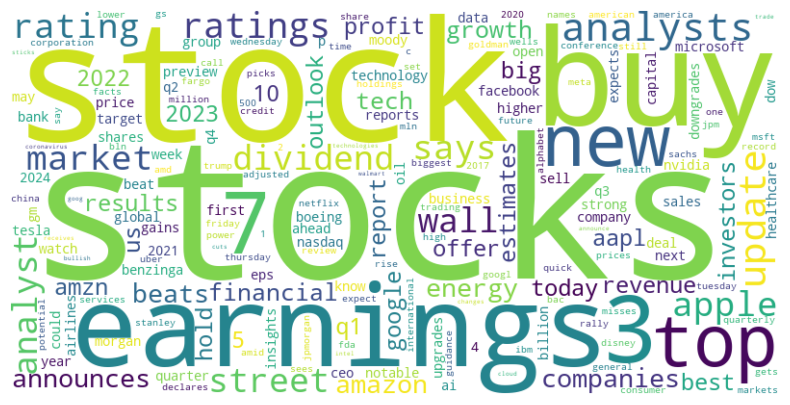

In [28]:
# Convert list of lists to a dictionary
top_500_words_dict = dict(top_500_words)

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_500_words_dict)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Most common words by stock

In [29]:
# Group by 'stock' and apply the function
word_frequencies = df.groupby('ticker').apply(lambda x: get_top_word_frequencies(x, top_n=200))

# Convert to a regular dictionary
word_frequencies = {stock: dict(freq) for stock, freq in word_frequencies.items()}

# Remove common stopwords from WordClouds
for stock in word_frequencies:
    for word in list(word_frequencies[stock].keys()):
        if word in STOPWORDS:
            del word_frequencies[stock][word]

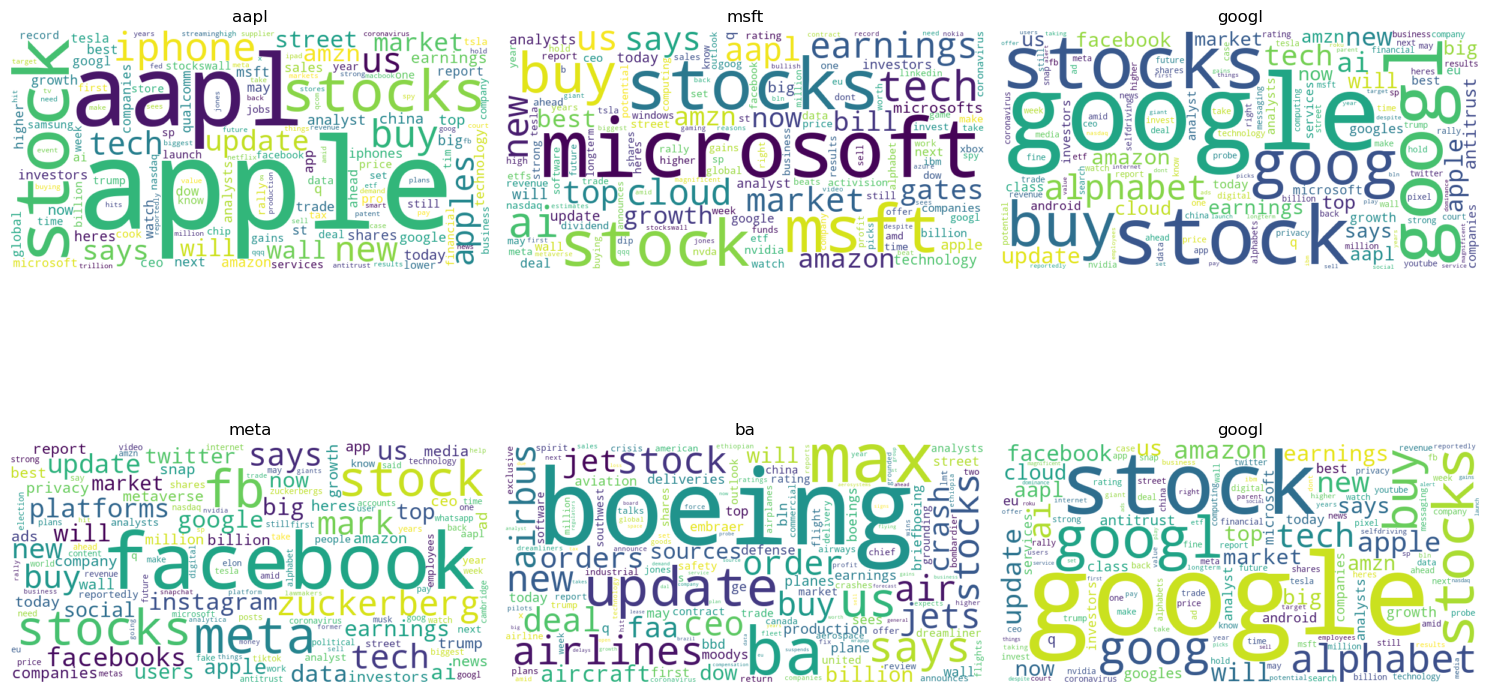

In [30]:
# Generate and plot WordClouds for the specified stocks
stocks_to_plot = ['aapl', 'msft', 'googl', 'meta', 'ba', 'googl']
num_stocks = len(stocks_to_plot)

# Determine layout of subplots based on number of stocks
cols = 3
rows = (num_stocks - 1) // cols + 1

plt.figure(figsize=(15, 5 * rows))

for i, stock in enumerate(stocks_to_plot, 1):
    plt.subplot(rows, cols, i)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies[stock])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(stock)

plt.tight_layout()
plt.show()